<a href="https://colab.research.google.com/github/radityajs28/Praktikum-ML/blob/main/(versi_3)_Kegiatan_Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #1**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang telah dibangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### Pengenalan tugas kegiatan 1

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

### 1. Initial process



* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

* Untuk selanjutnya pahami code dibawah dengan baik.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/DATASETS"

In [3]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/DATASETS

/content/drive/My Drive/DATASETS


In [4]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

batuguntingkertas  dataset  kaggle.json


* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google dari kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 99% 303M/306M [00:03<00:00, 88.3MB/s]
100% 306M/306M [00:03<00:00, 88.4MB/s]


In [6]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

batuguntingkertas  dataset  kaggle.json


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


Buat folder baru bernama `dataset` dan memindahkan folder `paper, rock, scissors` kedalam folder `dataset`. Selanjutnya, lakukan splitting dataset menjadi 3 bagian `train, test, val` dan simpan ketiga folder tersebut diluar folder `dataset`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
!mkdir dataset

In [ ]:
!mv -t dataset paper rock scissors

In [ ]:
!mkdir train
!mkdir test
!mkdir val

In [ ]:
!rm -rf rps-cv-images
!rm *.txt

In [ ]:
import os
kertas = os.listdir('/content/drive/MyDrive/DATASETS/dataset/paper')
batu = os.listdir('/content/drive/MyDrive/DATASETS/dataset/rock')
gunting = os.listdir('/content/drive/MyDrive/DATASETS/dataset/scissors')

In [ ]:
print('kertas :' + str(len(kertas)))
print('batu :' + str(len(batu)))
print('gunting :' + str(len(gunting)))

kertas :712
batu :726
gunting :750


In [ ]:
!mkdir batuguntingkertas
!mv -t batuguntingkertas test train val

mkdir: cannot create directory ‘batuguntingkertas’: File exists


In [ ]:
!ls batuguntingkertas

test  train  val


In [5]:
base_dir = '/content/drive/MyDrive/DATASETS/batuguntingkertas'
data_dir = '/content/drive/MyDrive/DATASETS/dataset'

In [8]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 2188 files [09:45,  3.74 files/s]


In [6]:
tr_kertas = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/train/paper')
tr_batu = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/train/rock')
tr_gunting = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/train/scissors')

ts_kertas = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/test/paper')
ts_batu = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/test/rock')
ts_gunting = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/test/scissors')

val_kertas = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/val/paper')
val_batu = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/val/rock')
val_gunting = os.listdir('/content/drive/MyDrive/DATASETS/batuguntingkertas/val/scissors')

In [7]:
print('train kertas :' + str(len(tr_kertas)))
print('train batu :' + str(len(tr_batu)))
print('train gunting :' + str(len(tr_gunting)))

print('test kertas :' + str(len(ts_kertas)))
print('test batu :' + str(len(ts_batu)))
print('test gunting :' + str(len(ts_gunting)))

print('val kertas :' + str(len(val_kertas)))
print('val batu :' + str(len(val_batu)))
print('val gunting :' + str(len(val_gunting)))

train kertas :498
train batu :508
train gunting :525
test kertas :108
test batu :110
test gunting :113
val kertas :106
val batu :108
val gunting :112


### 2. Data Preprocessing

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit proses augmentasi sederhana. 

**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

Lakukan proses agumentasi sederhana pada dataset anda menggunakan `ImageDataGenerator` dengan ketentuan melakukan proses seperti berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.

In [8]:
# TULIS KODE ANDA DISINI
train_path = os.path.join(base_dir,'train')
test_path = os.path.join(base_dir,'test')
val_path = os.path.join(base_dir,'val')

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

Batch_size=32
augmen_gen = ImageDataGenerator(rescale=1. /255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size = Batch_size,
    color_mode = 'rgb'
)

val_gen = augmen_gen.flow_from_directory(
    val_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size = Batch_size,
    color_mode = 'rgb'
)

test_gen = augmen_gen.flow_from_directory(
    test_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size = Batch_size,
    color_mode = 'rgb'
)

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


### 3. Definisikan Model CNN

Bangun model CNN dan lakukan evaluasi sesuai kriteria **WAJIB** berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix
* Pastikan nilai akurasi model > 80%
* Mendefinisikan minimal 100 epoch untuk masing-masing model
* Melakukan prediksi minimal 15 gambar acak yang dapat mewakili seluruh kelas
* Menampilkan input gambar yang di prediksi beserta label hasil prediksi, nilai akurasi prediksi, dan lama waktu prediksi dalam sebuah plot. (15 gambar ditampilkan dalam 1 plot)
* Save model dalam file `json` dan simpan bobot dalam file `HDF5`
* Pastikan model anda dapat memprediksi unseen data dengan benar.

In [10]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import time

In [11]:
model = Sequential()

model.add(InputLayer(input_shape=[224,224,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 128)       0

In [12]:
learning_rate=0.00001
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
start = time.time()
H = model.fit_generator(train_gen,
                        epochs=100,
                        validation_data=val_gen,
                        validation_steps = 4,
                        verbose=1)
End = time.time()
print('training time: ', End-start,'s')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
48/48 [==============================] - 333s 7s/step - loss: 1.1928 - accuracy: 0.3978 - val_loss: 1.0839 - val_accuracy: 0.4141
Epoch 2/100
48/48 [==============================] - 43s 894ms/step - loss: 1.0200 - accuracy: 0.4990 - val_loss: 1.0718 - val_accuracy: 0.5391
Epoch 3/100
48/48 [==============================] - 34s 718ms/step - loss: 0.9999 - accuracy: 0.5127 - val_loss: 1.0635 - val_accuracy: 0.6172
Epoch 4/100
48/48 [==============================] - 32s 666ms/step - loss: 0.9230 - accuracy: 0.5558 - val_loss: 1.0427 - val_accuracy: 0.6562
Epoch 5/100
48/48 [==============================] - 28s 590ms/step - loss: 0.8883 - accuracy: 0.5937 - val_loss: 1.0256 - val_accuracy: 0.6875
Epoch 6/100
48/48 [==============================] - 28s 584ms/step - loss: 0.8105 - accuracy: 0.6395 - val_loss: 1.0008 - val_accuracy: 0.6562
Epoch 7/100
48/48 [==============================] - 27s 570ms/step - loss: 0.7776 - accuracy: 0.6604 - val_loss: 0.9422 - val_accuracy: 0

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
ypred = model.predict(test_gen)
predictions = np.argmax(ypred, axis=1)
print(classification_report(test_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36       108
           1       0.30      0.30      0.30       110
           2       0.34      0.34      0.34       113

    accuracy                           0.33       331
   macro avg       0.33      0.33      0.33       331
weighted avg       0.33      0.33      0.33       331



Confusion matrix, without normalization
[[39 29 40]
 [43 33 34]
 [27 48 38]]


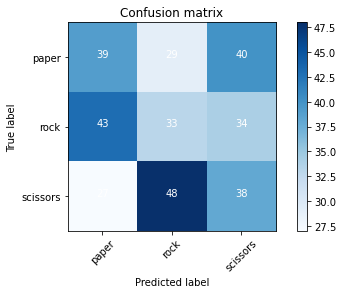

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_gen.class_indices)

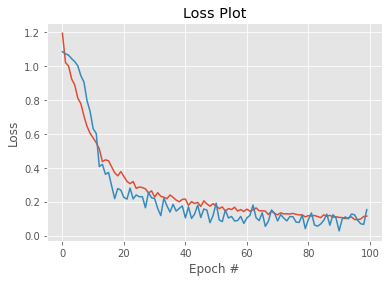

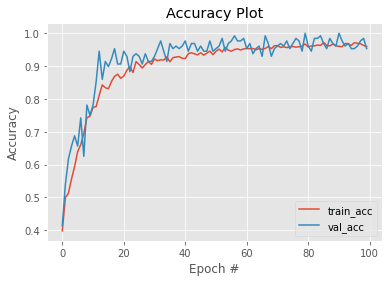

In [22]:
plt.style.use("ggplot")

plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

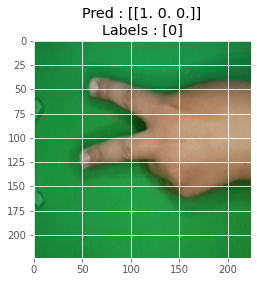

In [27]:
import PIL

def predictModel(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    img_resized = img.resize((224, 224), PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred_coba = model.predict(img_array)
    ahoy = model.predict(img_array)
    
    labels = np.argmax(ahoy, axis=1)

    plt.title(f"Pred : {ahoy}\nLabels : {labels}")

predictModel("/content/drive/MyDrive/DATASETS/batuguntingkertas/test/scissors/1vQCX4af6hQmuwxZ.png")

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

